In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv("weatherAUS.csv")

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.shape

(145460, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
data.isnull().sum()


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
"""data.dropna(axis=1, thresh=3, inplace=True) 
data.info()"""

'data.dropna(axis=1, thresh=3, inplace=True) \ndata.info()'

In [9]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
data_copy = data.copy()


columns_to_replace = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
                      'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
                      'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                      'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm','RainTomorrow','RainToday']

data_copy[columns_to_replace] = data_copy[columns_to_replace].replace(0, np.nan)

numerical_cols = data_copy.select_dtypes(include=['float64']).columns
data_copy[numerical_cols] = data_copy[numerical_cols].fillna(data_copy[numerical_cols].median())

categorical_cols = data_copy.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data_copy[col] = data_copy[col].fillna(data_copy[col].mode()[0])

data_copy.info()

data_copy.to_csv('cleaned_weatherAUS_zero_replaced.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [11]:
binary_cols = ['RainToday', 'RainTomorrow']

data_copy[binary_cols] = data_copy[binary_cols].replace({'Yes': 1, 'No': 0})

data_copy[binary_cols] = data_copy[binary_cols].astype('float64')
print(data_copy[binary_cols].head())


   RainToday  RainTomorrow
0        0.0           0.0
1        0.0           0.0
2        0.0           0.0
3        0.0           0.0
4        0.0           0.0


C:\Users\Marvin Nasser\AppData\Local\Temp\ipykernel_1128\1438527204.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy[binary_cols] = data_copy[binary_cols].replace({'Yes': 1, 'No': 0})


In [12]:
from sklearn.preprocessing import LabelEncoder

wind_dir_cols = ['WindDir9am', 'WindDir3pm','WindGustDir','Location']

label_encoder = LabelEncoder()

for col in wind_dir_cols:
    data_copy[col] = label_encoder.fit_transform(data_copy[col]).astype('float64')

print(data_copy[wind_dir_cols].head())


   WindDir9am  WindDir3pm  WindGustDir  Location
0        13.0        14.0         13.0       2.0
1         6.0        15.0         14.0       2.0
2        13.0        15.0         15.0       2.0
3         9.0         0.0          4.0       2.0
4         1.0         7.0         13.0       2.0


In [13]:
data_copy['Date'] = data_copy['Date'].str.replace('/','',regex=False).astype('float64')
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  float64
 1   Location       145460 non-null  float64
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  float64
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  float64
 10  WindDir3pm     145460 non-null  float64
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [14]:
data_copy.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1212008.0,2.0,13.4,22.9,0.6,4.8,8.6,13.0,44.0,13.0,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,0.0
1,1222008.0,2.0,7.4,25.1,2.2,4.8,8.6,14.0,44.0,6.0,...,44.0,25.0,1010.6,1007.8,6.0,5.0,17.2,24.3,0.0,0.0
2,1232008.0,2.0,12.9,25.7,2.2,4.8,8.6,15.0,46.0,13.0,...,38.0,30.0,1007.6,1008.7,6.0,2.0,21.0,23.2,0.0,0.0
3,1242008.0,2.0,9.2,28.0,2.2,4.8,8.6,4.0,24.0,9.0,...,45.0,16.0,1017.6,1012.8,6.0,5.0,18.1,26.5,0.0,0.0
4,1252008.0,2.0,17.5,32.3,1.0,4.8,8.6,13.0,41.0,1.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


<Axes: xlabel='RainTomorrow'>

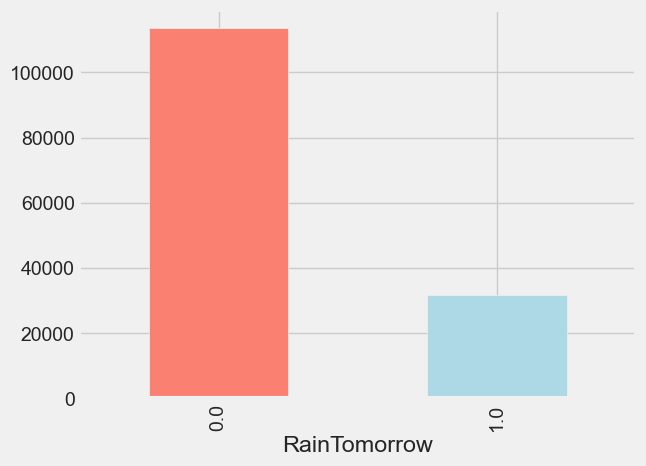

In [15]:
data_copy.RainTomorrow.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [16]:
from imblearn.over_sampling import SMOTE

X = data_copy.drop(columns=['RainTomorrow'])
y = data_copy['RainTomorrow']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
data_balanced['RainTomorrow'] = y_resampled

print(data_balanced['RainTomorrow'].value_counts())


RainTomorrow
0.0    113583
1.0    113583
Name: count, dtype: int64


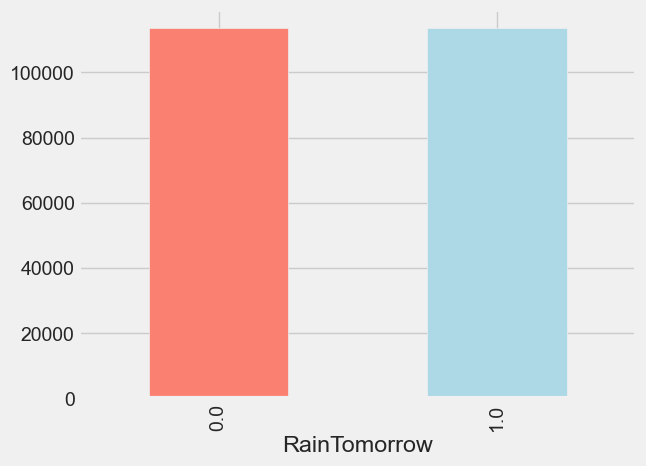

In [17]:
data_balanced.RainTomorrow.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
data_copy.to_csv('cleaned_weatherAUS_final.csv', index=False)


<Axes: >

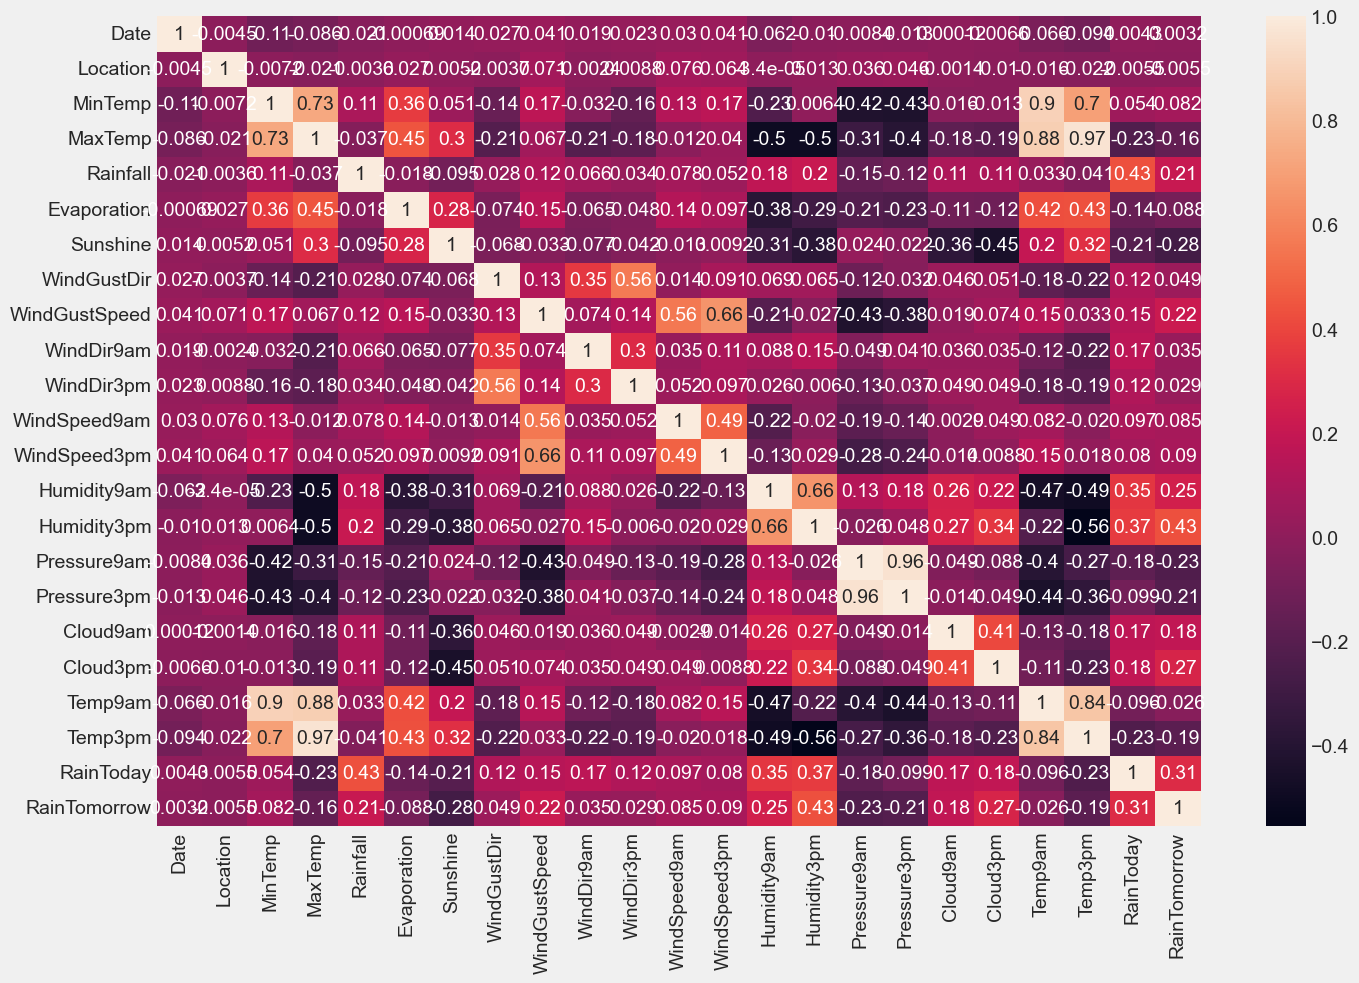

In [18]:
plt.figure(figsize=(15,10))

sns.heatmap(data_copy.corr(method='pearson'),annot=True)

<Axes: xlabel='Rainfall'>

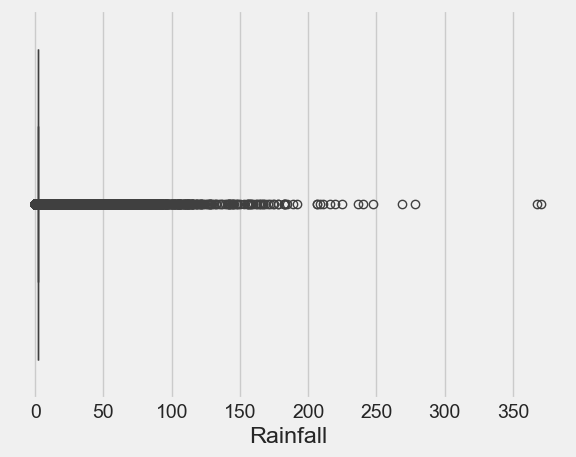

In [19]:
sns.boxplot(x='Rainfall', data=data_copy)

New Shape after IQR-based outlier removal:  (142023, 23)


<Axes: xlabel='Rainfall'>

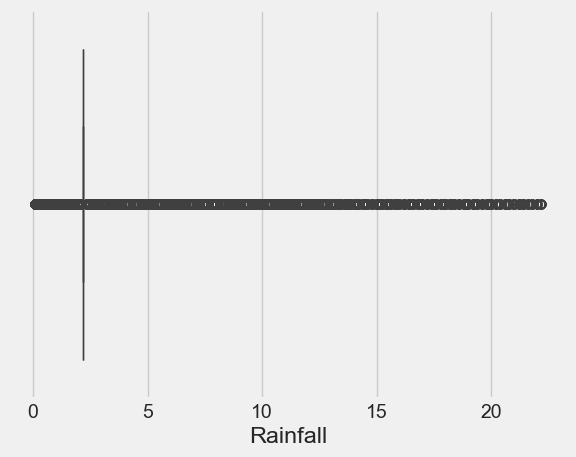

In [ ]:
data_copy['Rainfall'].dropna(inplace=True)

Q1 = data_copy['Rainfall'].quantile(0.1)
Q3 = data_copy['Rainfall'].quantile(0.9)
IQR = Q3 - Q1

upper_bound = Q3 + 3 * IQR
lower_bound = Q1 - 3 * IQR

data_copy = data_copy[(data_copy['Rainfall'] >= lower_bound) & (data_copy['Rainfall'] <= upper_bound)]

print("New Shape after IQR-based outlier removal: ", data_copy.shape)

sns.boxplot(x='Rainfall', data=data_copy)


<Axes: title={'center': 'Correlation with RainTomorrow'}>

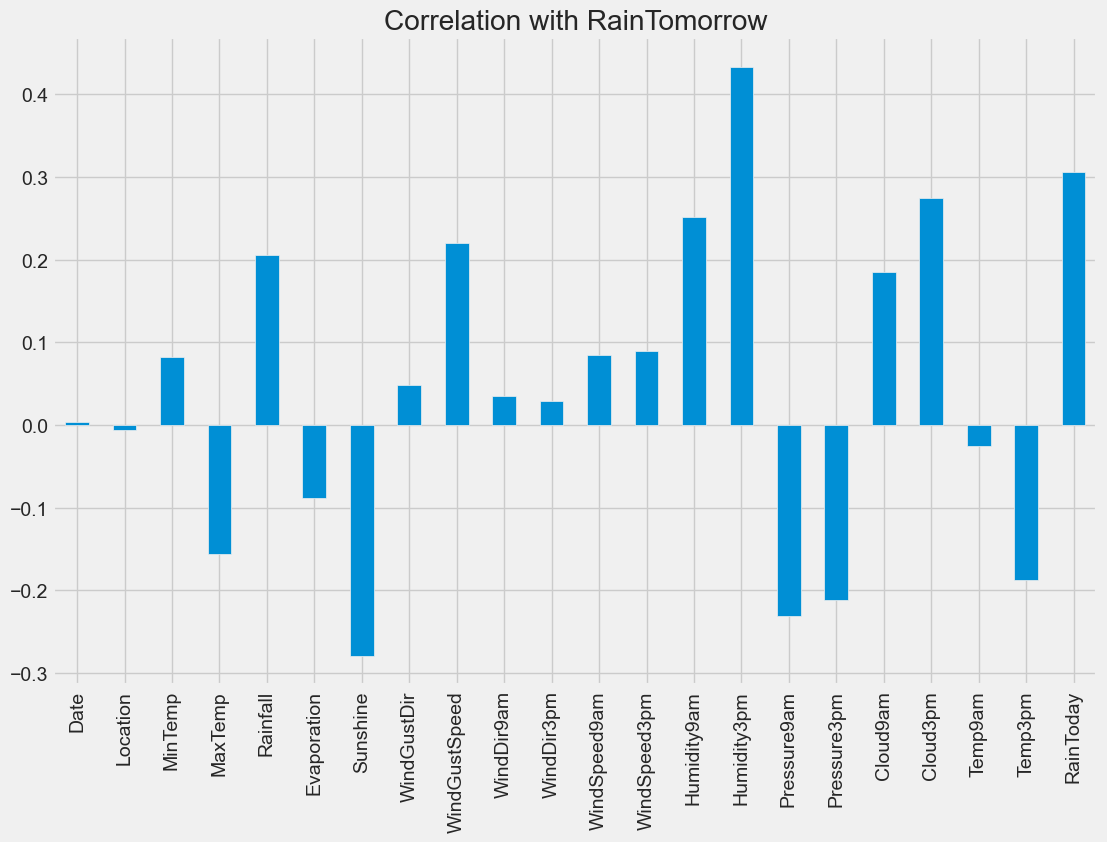

In [21]:
X.corrwith(y).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with RainTomorrow")

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard

array([[-0.92264222, -1.53166617,  0.18807409, ..., -0.01415855,
         0.01878562, -0.52979545],
       [-0.92011204, -1.53166617, -0.75636571, ...,  0.03239827,
         0.38392874, -0.52979545],
       [-0.91758187, -1.53166617,  0.10937077, ...,  0.62211806,
         0.22326576, -0.52979545],
       ...,
       [ 0.34750777,  1.20928479, -1.07117897, ..., -0.69699199,
         0.64683178, -0.52979545],
       [ 0.35003794,  1.20928479, -0.69340305, ..., -0.2934995 ,
         0.63222606, -0.52979545],
       [ 0.35256811,  1.20928479,  0.42418404, ..., -0.30901845,
        -0.11266591, -0.52979545]])

In [23]:
pca_model = PCA(n_components = 4)
pca_data_standard = pca_model.fit_transform(X_standard)
pca_data_standard

array([[ 0.67553171, -1.67849267,  1.23054491,  1.68683247],
       [ 0.97171734, -0.29024495,  1.21603708,  2.12397761],
       [ 1.76676422, -1.22367771,  2.29709663,  2.0351321 ],
       ...,
       [ 0.02490932,  1.61327701,  0.69781471,  0.59756911],
       [ 0.75293554,  2.41017528,  0.80661699,  0.52936079],
       [-0.15816453,  0.26084798, -0.43454688, -1.01715633]])

In [24]:
dataset = pd.DataFrame(data = pca_data_standard, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
dataset['RainTomorrow'] = y
dataset.tail()

,PC1,PC2,PC3,PC4,RainTomorrow
145455,-0.564836,2.584143,0.068543,-1.428732,0.0
145456,-0.469591,2.502559,0.142124,-0.225303,0.0
145457,0.024909,1.613277,0.697815,0.597569,0.0
145458,0.752936,2.410175,0.806617,0.529361,0.0
145459,-0.158165,0.260848,-0.434547,-1.017156,0.0


In [28]:
from sklearn.model_selection import train_test_split

X = dataset.drop('RainTomorrow', axis=1)
y = dataset.RainTomorrow
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

(145460,)


In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(116368, 4)
(29092, 4)
(116368,)
(29092,)


In [32]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(16, 16, 16), activation='relu', solver='adam', max_iter=1000, alpha=0.0001, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_predictions = mlp_model.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_test, mlp_predictions) * 100)


Neural Network Accuracy: 82.90480773637655
